# IST 652 Lab #4
### Instructions
- Complete all 6 questions in this assignment.
- You may work with others, <b> but the work you submit must be your own </b>. You can differentiate your work by adding comments or changing the values you use to test your code. However, submitting some else's work as your own is an academic integrity violation and will be raised to academic affairs.
- It is always better to attempt a problem as partial credit may be granted.


### Submission Guide:
- Submit your answers on BlackBoard by Saturday 2019-03-23.
- The file must be either a .py or .ipynb file type.
- <i><span style="color:red">The name of the file you submit should be <i><b> ist652_lab4_lastname.py (.ipynb) </i></b>.</span>



### Grading [ 6 total points ]
For Each Questions (1-6), the following credit will be awarded:
- 0.75 for printing the correct answer to the console.
- 0.15 for approaching the problem efficiently.
- 0.05 for properly documenting and commenting your code.


---
## Questions

### Web Scraping: HTML

#### ( 1a ) Choose a web site and retrieve the HTML data using urllib.
- If it doesn’t return a page (perhaps because it uses cookies or other interactions to actually return content), try a different site.
    - <b>NOTE:</b> Some sites (e.g. Google) blocks webscrapers so your code will run once or twice, but then fail. Please be conscious of this.
    
#### ( 1b ) Use BeautifulSoup to parse the object (like we did in class).

<br><b>NOTE:</b> The BeatifulSoup object will be used in (2) and (3).

##### [1 point]

In [2]:
from urllib import request
from bs4 import BeautifulSoup

In [17]:
# Enter your code here, printing relevant answers to console:\
url = "https://en.wikipedia.org/wiki/Machine_learning"
response = request.urlopen(url)
html = response.read().decode('utf8')

htmlsoup = BeautifulSoup(html, 'html.parser')
type(htmlsoup)

firsttitle = htmlsoup.title
print(firsttitle.get_text())

Machine learning - Wikipedia


---
#### ( 2 ): Count the number of hyperlink URLs (which begin with http) in the <u>head</u> & <u>body</u> tags.

##### [1 point]

In [33]:
# Enter your code here, printing relevant answers to console:
anchors = htmlsoup.body.find_all('a') + htmlsoup.head.find_all('a')

links = [link.get('href') for link in anchors]
links = [link for link in links if link != None and link.startswith("http")]

print(len(links))


192


 ----

#### ( 3a ):  Generate a unique list of hyperlink URLs (which begin with http) from the <u>body</u> tag and convert it into a pandas <u>series</u> object.
- If your website body has no hyperlinks, please select a new website and repeat question (1).


#### ( 3b ):  Create a function which parses the domain name (parent website) from a hyperlink URL.
- for example:
    - <b>URL:</b> http://www.espn.com/mens-college-basketball/story/_/id/26281956/know-every-team-bracket
    - <b>domain name:</b> espn.com
        - or www.espn.com

#### ( 3c ): Create a new pandas series composed of domain names.
- Consider using the <b>series.map()</b> method, applying your function from (3b) over the series in (3a)

##### [1 point]

In [35]:
import pandas as pd

In [104]:
# Enter your code here, printing relevant answers to console:
links = [link.replace("https://","") for link in links]
domains = [link.split('/')[0] for link in links]
df = pd.DataFrame({"links":domains})
df



,links
0,arxiv.org
1,en.wikipedia.org
2,www.cs.cmu.edu
3,www.deeplearningbook.org
4,doi.org
...,...
187,www.mediawiki.org
188,stats.wikimedia.org
189,foundation.wikimedia.org
190,wikimediafoundation.org


----

### Web Scraping: XML

#### ( 4a ) Choose an RSS feed site and retrieve the XML data using urllib.
- If it doesn’t return a page (perhaps because it uses cookies or other interactions to actually return content), try a different site.
- Here is a list of RSS Feeds to get you started:
    - <b>https://rss.com/popular-rss-feeds/</b>

#### ( 4b ) Use ElementTree to parse the object (like we did in class).


##### [1 point]

In [61]:
# Enter your code here, printing relevant answers to console:
import urllib.request
import xml.etree.ElementTree as etree
import io

url = "http://joeroganexp.joerogan.libsynpro.com/rss"

xmlstring = urllib.request.urlopen(url).read().decode('utf8')
len(xmlstring)

xmlfile = io.StringIO(xmlstring)
tree = etree.parse(xmlfile)
root = tree.getroot()
firstchild = root[0]
firstgrandchild = firstchild[1]
firstgrandchild.text


'The Joe Rogan Experience'

---
#### ( 5 ): Count the number of Top-level <u>parent tags</u> & their number of <u>child</u> tags.
- Top-level means that a tag has <b><u>no</b></u> parent tag
- Only count direct children to these top level tags
    - Do not count grandchildren, etc

##### [1 point]

In [85]:
# Enter your code here, printing relevant answers to console:

itemlist = firstchild.findall('item')
len(firstchild)
print(len(itemlist))



1724


---
#### ( 6a ): Convert all of the items of your RSS XML into a pandas dataframe.
- An item in an RSS feed begins with an item tag < item > ... < /item >
- Each row represents 1 item
- Each column represents 1 child-tag to the parent <u>item</u> tag:
    - i.e.: Title, Link, PubDate, Category
        - Ignore children of these tags

#### ( 6b ): Provide summary statistics about the dataframe.
- Consider using the .describe() method

##### [1 point]

### FOR EXAMPLE
https://api.foxsports.com/v1/rss?partnerKey=zBaFxRyGKCfxBagJG9b8pqLyndmvo7UU&tag=soccer
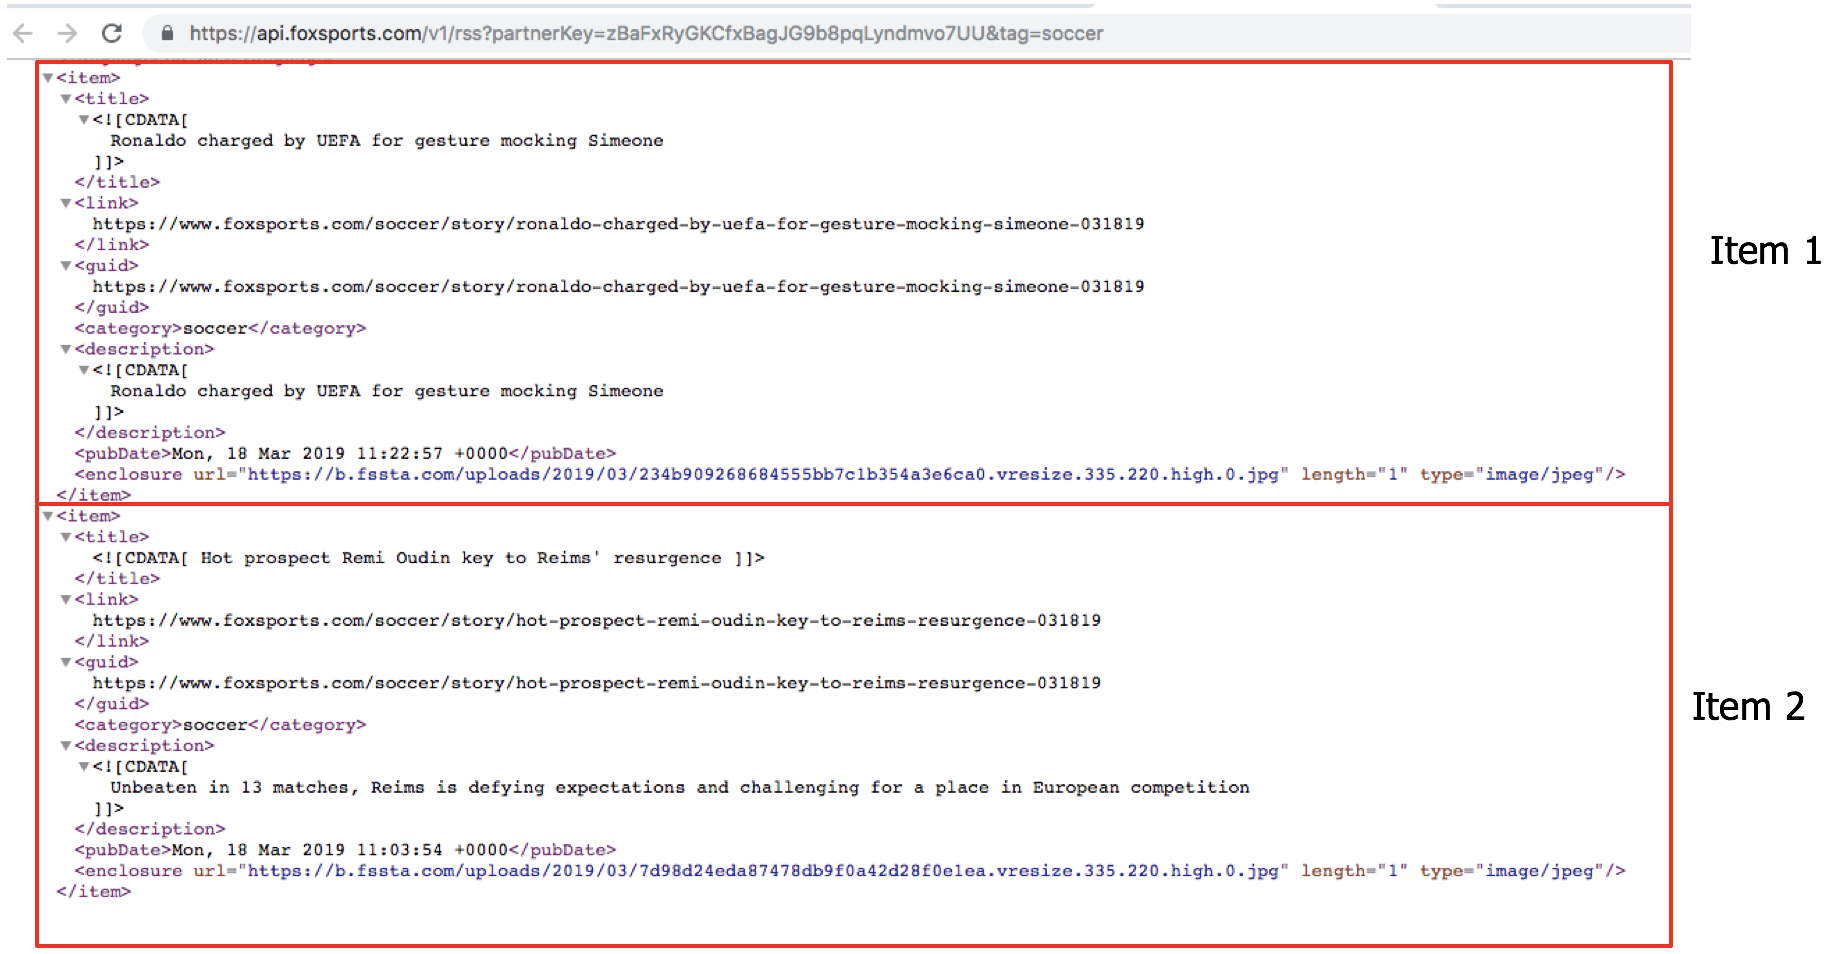

In [117]:
# Enter your code here, printing relevant answers to console:
from pprint import pprint

ls = []
for item in itemlist:
    temp = {}
    for i in item:
        temp[i.tag] = i.text
        
    ls.append(temp)
    

df = pd.DataFrame(ls)

df

,title,pubDate,guid,link,{http://www.itunes.com/dtds/podcast-1.0.dtd}image,description,{http://purl.org/rss/1.0/modules/content/}encoded,{http://www.itunes.com/dtds/podcast-1.0.dtd}keywords,{http://www.itunes.com/dtds/podcast-1.0.dtd}subtitle,{http://www.itunes.com/dtds/podcast-1.0.dtd}episode,{http://www.itunes.com/dtds/podcast-1.0.dtd}episodeType,enclosure,{http://www.itunes.com/dtds/podcast-1.0.dtd}duration,{http://www.itunes.com/dtds/podcast-1.0.dtd}explicit,{http://www.itunes.com/dtds/podcast-1.0.dtd}summary
0,#1551 - Paul Saladino,"Fri, 16 Oct 2020 19:00:00 +0000",eb3084e2-feea-4a14-80f9-9c32fb6e6e19,http://joeroganexp.joerogan.libsynpro.com/1551...,None,Dr. Paul Saladino is a physician and board-cer...,Dr. Paul Saladino is a physician and board-cer...,"podcast,paul,joe,party,experience,freak,rogan,...",Dr. Paul Saladino is a physician and board-cer...,1551,full,NaN,NaN,NaN,NaN
1,#1550 - Wesley Hunt,"Thu, 15 Oct 2020 19:00:00 +0000",c019b17a-f251-400d-ae64-a08aed7acfc8,http://traffic.libsyn.com/joeroganexp/p1550.mp3,None,Wesley Hunt is a candidate for Texas's 7th Con...,Wesley Hunt is a candidate for Texas's 7th Con...,"podcast,joe,party,experience,wesley,hunt,freak...",Wesley Hunt is a candidate for Texas's 7th Con...,1550,full,NaN,02:38:25,no,NaN
2,#1549 - Tom Papa,"Wed, 14 Oct 2020 19:00:00 +0000",6295ea9a-01fc-4bd5-88ed-1d939f64fb84,http://traffic.libsyn.com/joeroganexp/p1549.mp3,None,Comedian and writer Tom Papa is the host of th...,Comedian and writer Tom Papa is the host of th...,"podcast,joe,party,experience,tom,freak,papa,ro...",Comedian and writer Tom Papa is the host of th...,1549,full,NaN,03:11:04,no,NaN
3,#1548 - Roy Jones Jr.,"Tue, 13 Oct 2020 19:00:00 +0000",01e01246-2a55-49ad-ae09-0ceca6300fc6,http://traffic.libsyn.com/joeroganexp/p1548.mp3,None,Pro boxer Roy Jones Jr. captured championships...,Pro boxer Roy Jones Jr. captured championships...,"podcast,jr,joe,party,experience,jones,freak,ro...",Pro boxer Roy Jones Jr. captured championships...,1548,full,NaN,02:06:42,no,NaN
4,#1547 - Colin Quinn,"Thu, 08 Oct 2020 19:00:00 +0000",0303f085-1540-4312-9b8c-d73baeb385cb,http://traffic.libsyn.com/joeroganexp/p1547.mp3,None,Comedian Colin Quinn is a veteran of stage and...,Comedian Colin Quinn is a veteran of stage and...,"podcast,joe,party,experience,quinn,colin,freak...",Comedian Colin Quinn is a veteran of stage and...,1547,full,NaN,02:43:36,no,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1719,"PODCAST #5 - John Heffron, Ari Shaffir, Brian ...","Thu, 21 Jan 2010 19:23:00 +0000",http://blog.joerogan.net/?p=1834,http://blog.joerogan.net/archives/1834,None,Date: 01-21-2010\nThe raw audio from Joe Rogan...,Date: 01-21-2010\nThe raw audio from Joe Rogan...,"podcast,the,joe,rogan",Date: 01-21-2010 The raw audio from Joe Roga...,NaN,NaN,NaN,02:17:05,yes,NaN
1720,PODCAST #4 - Brian Redban,"Wed, 13 Jan 2010 19:16:00 +0000",http://blog.joerogan.net/?p=1829,http://blog.joerogan.net/archives/1829,None,Dates: 01-13-2010\nThe raw audio from Joe Roga...,Dates: 01-13-2010\nThe raw audio from Joe Roga...,"podcast,the,joe,rogan",Dates: 01-13-2010 The raw audio from Joe Roga...,NaN,NaN,NaN,02:18:25,yes,NaN
1721,"PODCAST #3 - Ari Shaffir, Brian Redban","Wed, 06 Jan 2010 19:12:00 +0000",http://blog.joerogan.net/?p=1827,http://blog.joerogan.net/archives/1827,None,Date: 01-06-2010\nThe raw audio from Joe Rogan...,Date: 01-06-2010\nThe raw audio from Joe Rogan...,"podcast,the,joe,rogan",Date: 01-06-2010 The raw audio from Joe Rogan...,NaN,NaN,NaN,02:15:00,yes,NaN
1722,PODCAST #2 - Brian Redban,"Tue, 29 Dec 2009 18:54:00 +0000",http://blog.joerogan.net/?p=1823,http://blog.joerogan.net/archives/1823,None,Date: 12-29-2009\nThe raw audio from Joe Rogan...,Date: 12-29-2009\nThe raw audio from Joe Rogan...,"podcast,the,joe,rogan",Date: 12-29-2009 The raw audio from Joe Roga...,NaN,NaN,NaN,02:32:07,yes,NaN
